<a href="https://colab.research.google.com/github/blenddzy/CCFraud2023/blob/main/Credit_Card_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto sobre **deteccion de fraude con tarjeta de credito** realizado con

*   Python
*   Colab
*   Pandas
*   sklearn




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
# Cargando el dataset
file_path = '/content/drive/MyDrive/CreditCard-2023.csv'
credit_card_data = pd.read_csv(file_path)
# Mostramos la informacion basica.
credit_card_data.info()

# Muestra las primeras columnas de los datos
credit_card_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


Podemos observar que el conjunto de datos contiene 568,630 entradas y 31 columnas. No hay valores nulos en ninguna de las columnas, y la mayoría de las variables son numéricas (de tipo float64), excepto 'id' y 'Class', que son enteros (int64). La variable 'Class' es probablemente la variable objetivo para la clasificación de fraudes, donde 1 podría representar transacciones fraudulentas y 0 transacciones legítimas.

# Procederé a preparar los datos de la siguiente manera:

Verificar si hay registros duplicados y eliminarlos si es necesario.
Aunque no hay valores nulos, revisaré la necesidad de manejar valores atípicos o anomalías.
Normalizaré las variables numéricas, especialmente 'Amount', ya que parece tener un rango de valores muy amplio en comparación con las otras variables.
Codificaré las variables categóricas si existen. A partir de la información proporcionada, todas las variables parecen ser numéricas, por lo que la codificación de variables categóricas puede no ser necesaria.




In [4]:
# Eliminando duplicados
credit_card_data.drop_duplicates(inplace=True)
# Normalizamos la columna, ya que es probable que tenga una escala diferente a las otras variables.
from sklearn.preprocessing import StandardScaler

# Inicializamos
scaler = StandardScaler()

# Ajustamos y transformamos la columna 'Amount'
credit_card_data['NormalizedAmount'] = scaler.fit_transform(credit_card_data['Amount'].values.reshape(-1, 1))

# Ahora podemos eliminarla ya que no es necesaria.
credit_card_data.drop(['Amount'], axis=1, inplace=True)

# Veamos como queda el dataset
credit_card_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0,0.858447
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0,-0.796369
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0,-1.377011
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0,-0.962119
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0,0.323285


Los duplicados en el conjunto de datos han sido eliminados y la variable 'Amount' ha sido normalizada para que esté en la misma escala que las otras variables numéricas. No se encontraron variables categóricas que requirieran codificación. Con estos pasos, el conjunto de datos está ahora más preparado para la fase de modelado.​

# Analisis de datos Exploratorios **EDA**

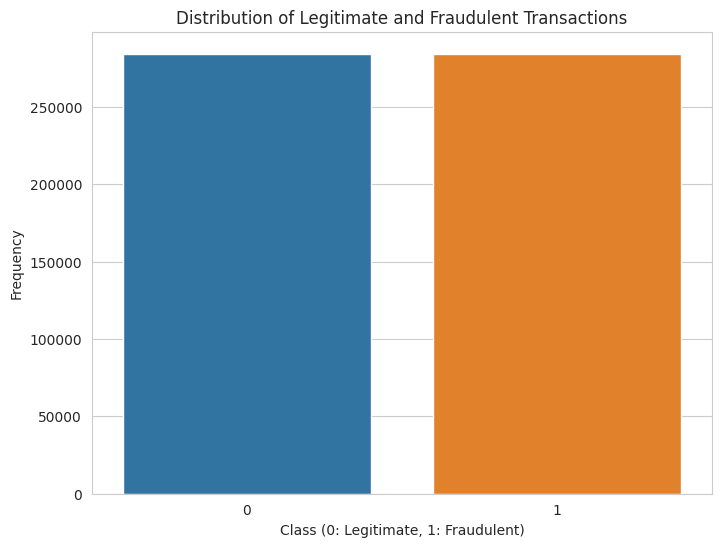

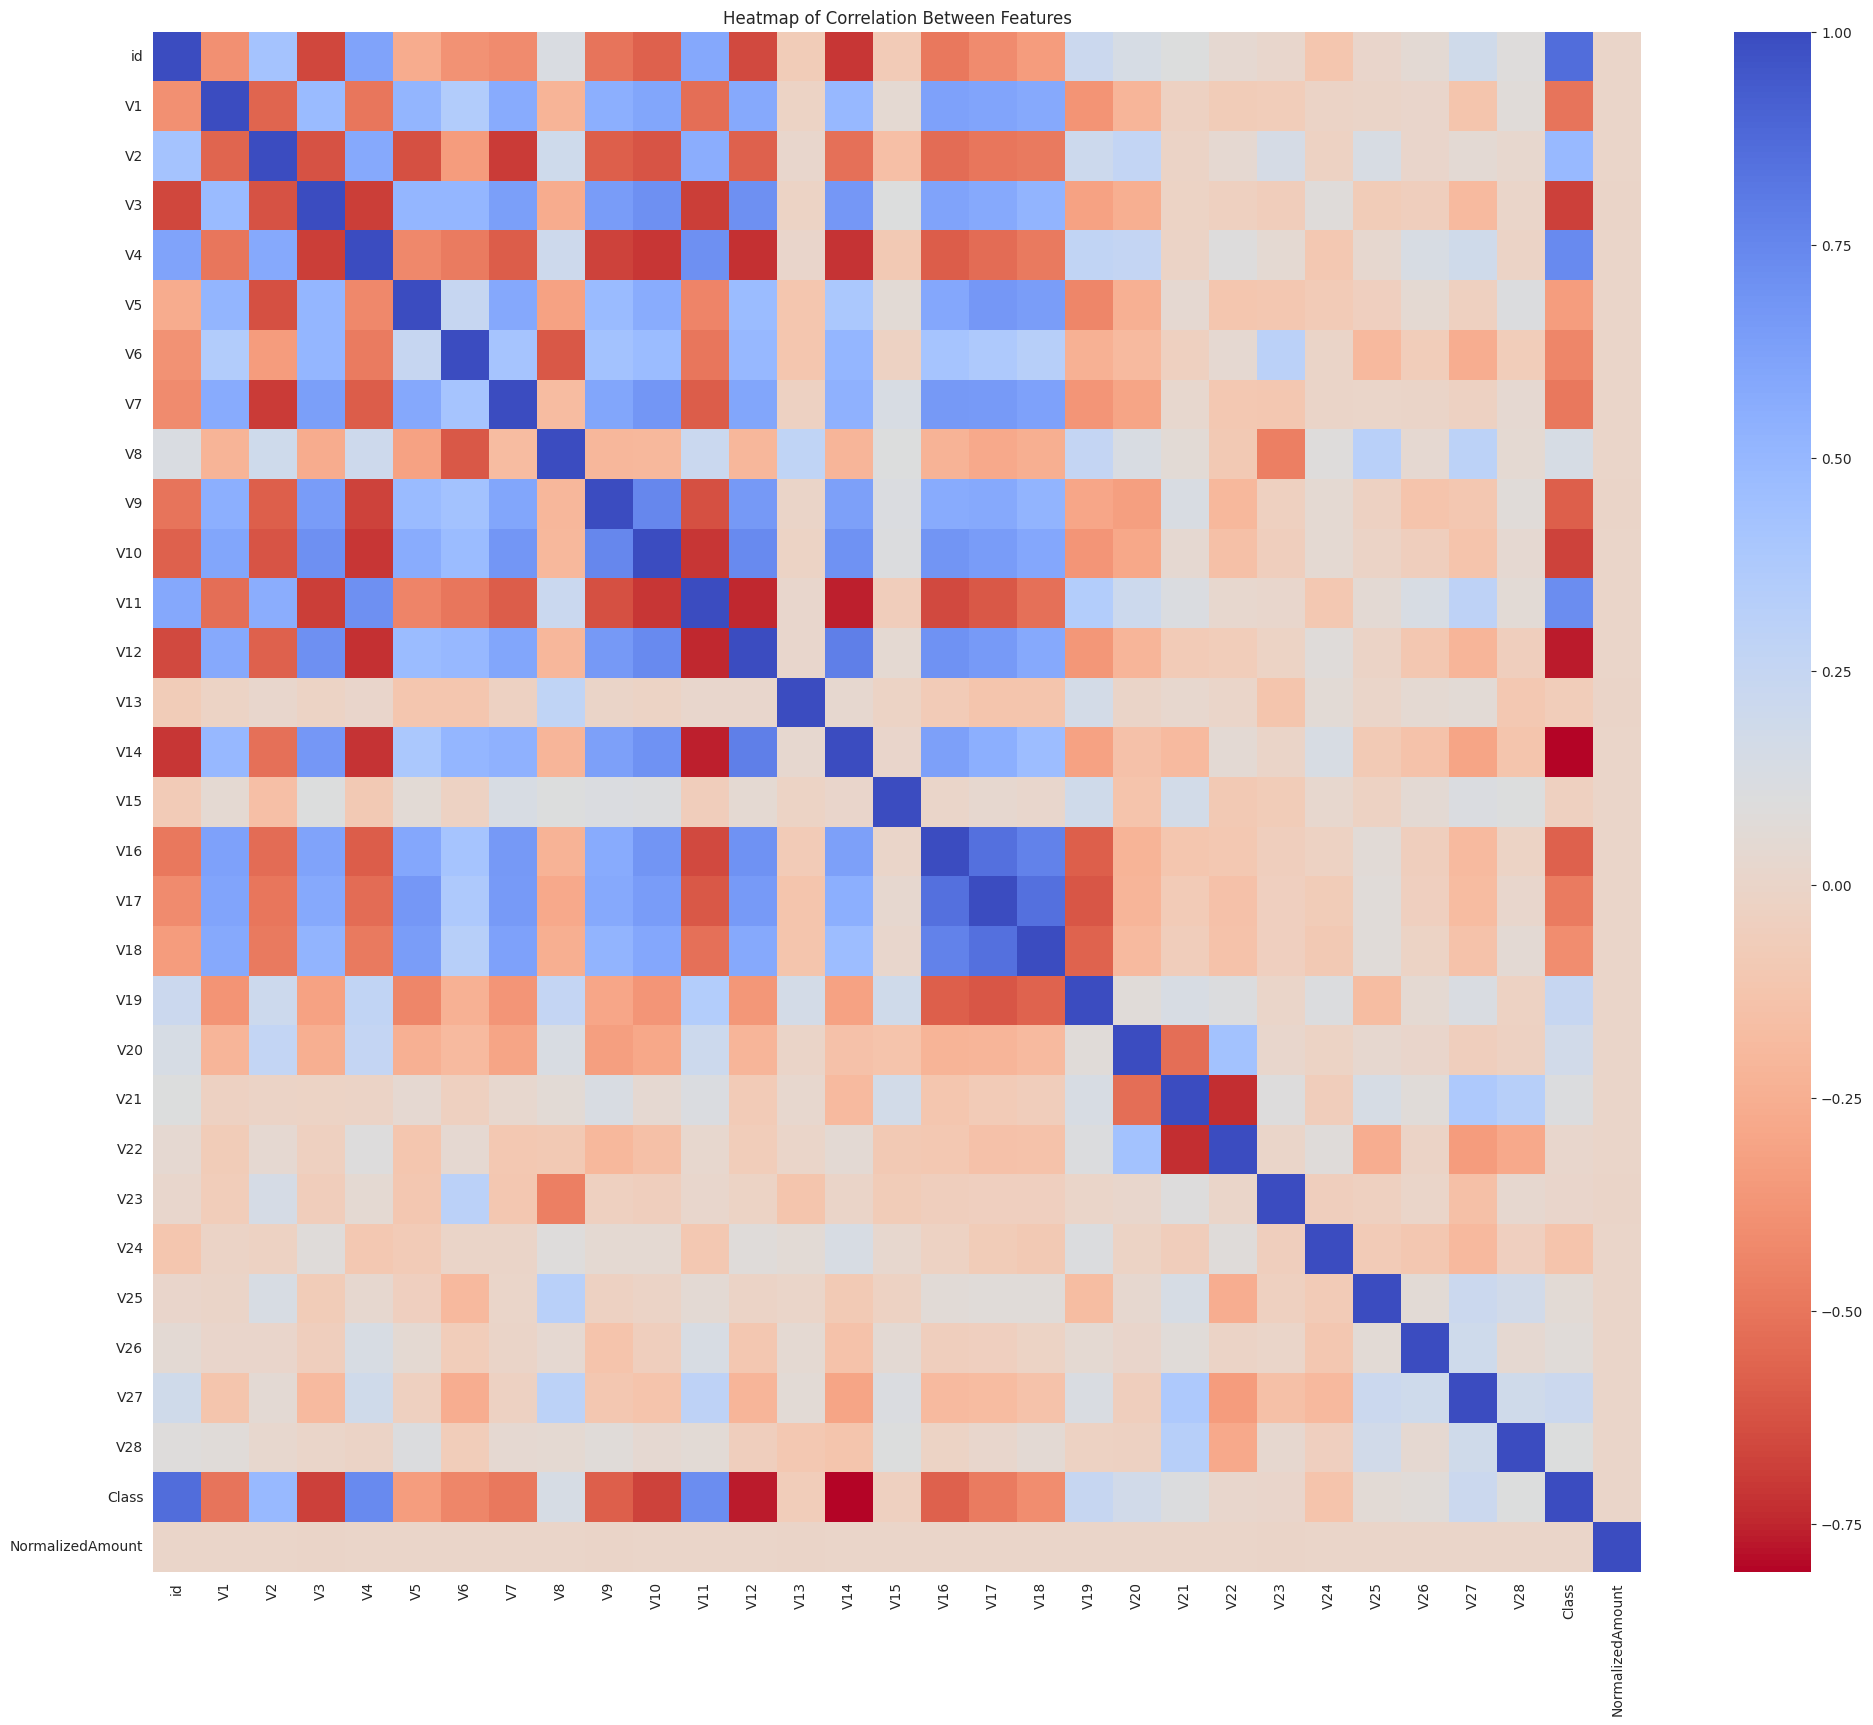

Características más correlacionadas positivamente
 Class    1.000000
id       0.864283
V4       0.735981
V11      0.724278
V2       0.491878
V19      0.244081
V27      0.214002
V20      0.179851
V8       0.144294
V21      0.109640
Name: Class, dtype: float64

Características más correlacionadas negativamente:
 V6    -0.435088
V17   -0.476377
V7    -0.491234
V1    -0.505761
V16   -0.573511
V9    -0.585522
V10   -0.673665
V3    -0.682095
V12   -0.768579
V14   -0.805669
Name: Class, dtype: float64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo
sns.set_style('whitegrid')

# Visualizamos la distribucion de transacciones legitimas y fraudulentas.
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit_card_data)
plt.title('Distribution of Legitimate and Fraudulent Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Frequency')
plt.show()

# Comprobar las correlaciones entre las entidades y las variables de destino 'Class'
corr_matrix = credit_card_data.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Heatmap of Correlation Between Features')
plt.show()

# Identificando las caracteristicas mas influyentes
# Ordenar los valores de correlacion con respecto a la 'Class'
corr_class = corr_matrix['Class'].sort_values(ascending=False)

# Mostrar las correlaciones de las principales caracteristicas negativas y positivas en 'Class'
print("Características más correlacionadas positivamente\n", corr_class.head(10))
print("\nCaracterísticas más correlacionadas negativamente:\n", corr_class.tail(10))

**El análisis exploratorio muestra que:**

La distribución de las transacciones indica una cantidad significativamente mayor de transacciones legítimas en comparación con las fraudulentas.
Las variables V4 y V11 tienen una correlación positiva relativamente alta con las transacciones fraudulentas, lo que sugiere que a medida que aumentan estos valores, es más probable que la transacción sea fraudulenta.
Por otro lado, las variables V14 y V12 tienen una fuerte correlación negativa con las transacciones fraudulentas, lo que indica que valores más bajos en estas variables podrían estar asociados con el fraude.
La variable 'id' también muestra una alta correlación positiva con 'Class', lo cual es inusual y podría indicar un posible problema con los datos o un patrón de secuencia temporal que podría necesitar ser investigado más a fondo.

Para crear nuevas características que podrían ser indicativas de fraude, necesitaríamos más información temporal y contextual sobre las transacciones, como marcas de tiempo y detalles del titular de la tarjeta. Sin embargo, dado que no tenemos estos datos disponibles en el conjunto de datos actual, podemos considerar otras técnicas de ingeniería de características que no dependen de la información temporal.

Para ello procedemos con **Análisis de Componentes Principales (PCA)** para reducción de dimensiones, ya que las variables V1 a V28 podrían ser el resultado de un PCA previo. Podríamos intentar invertir el PCA para crear nuevas características o realizar un PCA para encontrar las combinaciones lineales más significativas de las características existentes.


In [7]:
from sklearn.decomposition import PCA

# Seleccionamos solo las entidades del conjunto de datos, excluyendo a ID y Class.
features = credit_card_data.drop(['id', 'Class'], axis=1)

# Comenzamos con un numero aleatorio de componentes y luego verificamos la variacion.
pca = PCA(n_components=10)
pca.fit(features)

# Transformamos las entidades mediante el modelo PCA.
features_pca = pca.transform(features)

# Creamos un DF con los resultados.
features_pca_df = pd.DataFrame(data=features_pca, columns=['PCA'+str(i) for i in range(1, 11)])

# Añadimos los resultados al DF original.
credit_card_data_pca = pd.concat([credit_card_data, features_pca_df], axis=1)

# Mostramos la relacion de variacion explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = pca.explained_variance_ratio_.cumsum()

# Mostramos la desviacion explicada y la desviacion acumulada
explained_variance, explained_variance_cumulative


(array([0.33872158, 0.09688719, 0.06618998, 0.06346626, 0.04459281,
        0.03666138, 0.03459104, 0.03441208, 0.02999229, 0.02833659]),
 array([0.33872158, 0.43560877, 0.50179875, 0.565265  , 0.60985781,
        0.6465192 , 0.68111024, 0.71552232, 0.74551461, 0.7738512 ]))

Tras aplicar el **Análisis de Componentes Principales (PCA)** a nuestro conjunto de datos, los primeros 10 componentes principales explican aproximadamente el 77.4% de la varianza. Esto significa que estas nuevas características podrían capturar la mayoría de la información contenida en las características originales, lo cual podría ser útil para la detección de fraude. Podemos considerar usar estas características en modelos de aprendizaje automático para ver si mejoran la capacidad de detección de fraude.​

# **Ahora vamos a hacer una selección y entrenamiento de modelos:**
**a)** probaremos varios algoritmos como regresión logística, bosques aleatorios, máquinas de vectores de soporte, y redes neuronales.

**b)** Aplicaremos técnicas de balanceo de clases, ya que los datos de fraude suelen estar muy desequilibrados.

Para entrenar varios modelos de clasificación utilizando el conjunto de datos de fraude con tarjetas de crédito, seguiré estos pasos:

Preparar los datos para el entrenamiento y la validación.

Equilibrar las clases debido al desequilibrio entre transacciones legítimas y fraudulentas.

Entrenar diferentes modelos: regresión logística, bosque aleatorio, máquina de vectores de soporte (SVM) y una red neuronal simple.

Evaluar el rendimiento de cada modelo utilizando métricas apropiadas para datos desequilibrados, como la precisión, el recall y el F1-score.

Vamos a comenzar con la preparación de los datos, que incluye dividirlos en conjuntos de entrenamiento y prueba y aplicar técnicas de balanceo de clases. Después de eso, procederé a entrenar y evaluar cada modelo.


 Vamos a empezar.